In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('F:/Machine Learning/student.csv')

In [3]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
data.shape

(480, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.9+ KB


In [6]:
data1=data.select_dtypes(include='object')

In [7]:
data1.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,M


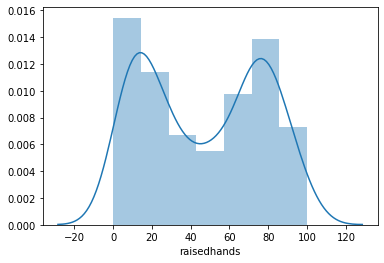

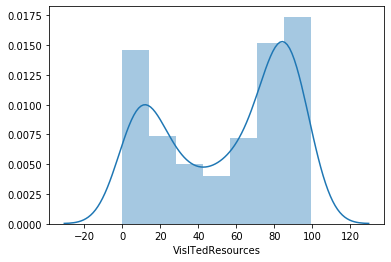

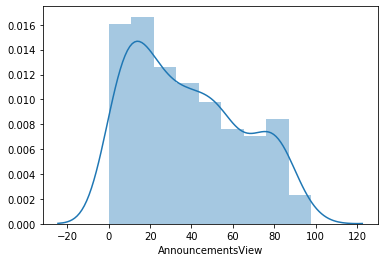

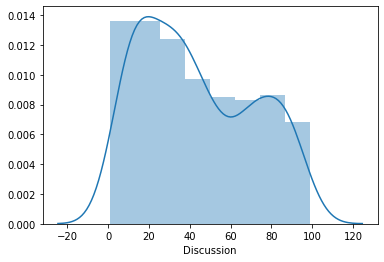

In [8]:
labels=['raisedhands','VisITedResources','AnnouncementsView','Discussion']
for i in range(len(labels)):
    plt.figure()
    sns.distplot(data[labels[i]])
    plt.xlabel(labels[i])

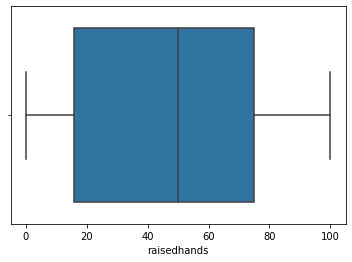

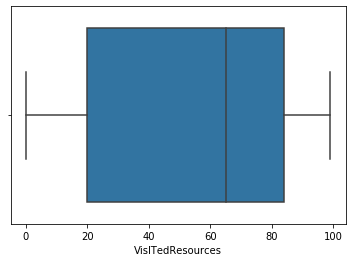

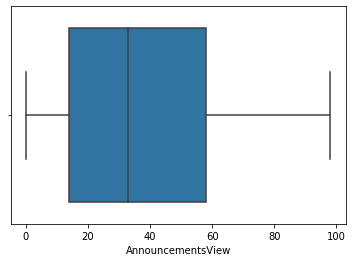

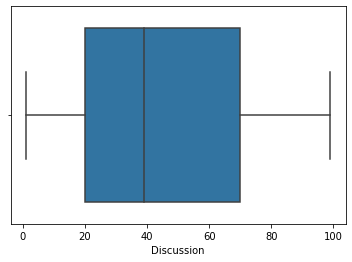

In [9]:
labels=['raisedhands','VisITedResources','AnnouncementsView','Discussion']
for i in range(len(labels)):
    plt.figure()
    sns.boxplot(x=data[labels[i]])
    plt.xlabel(labels[i])

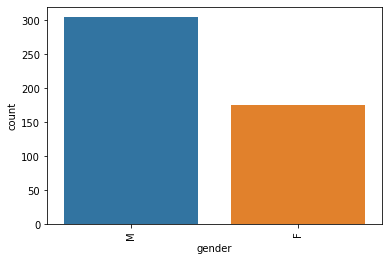

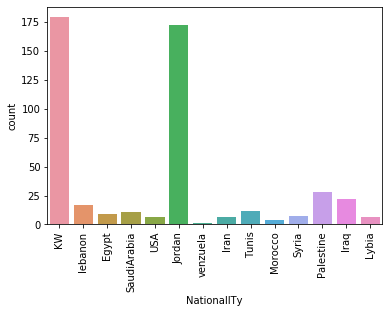

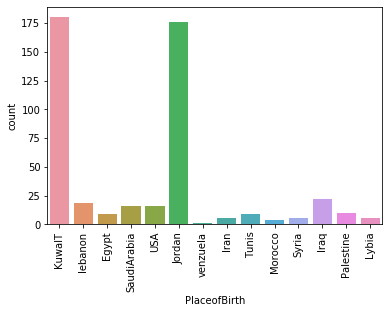

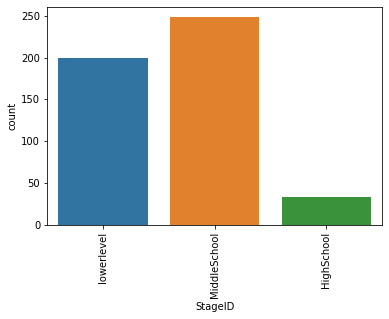

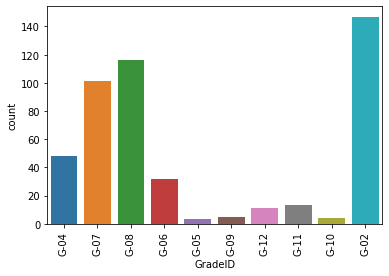

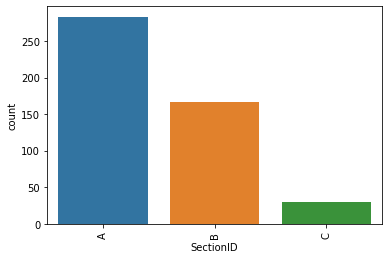

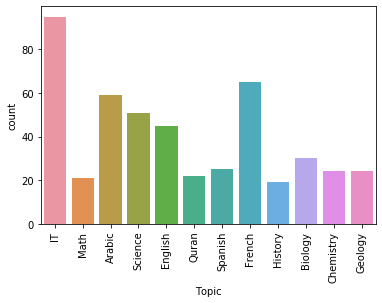

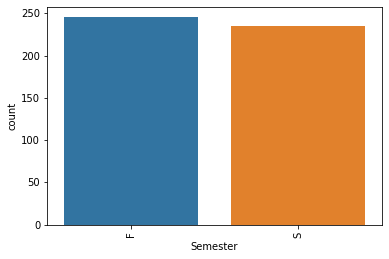

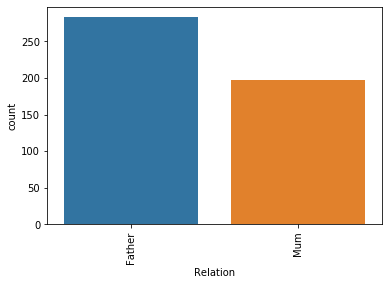

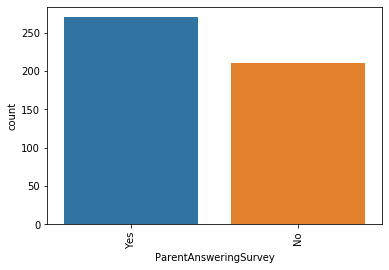

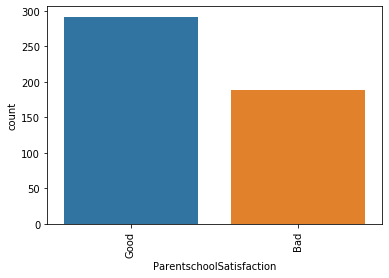

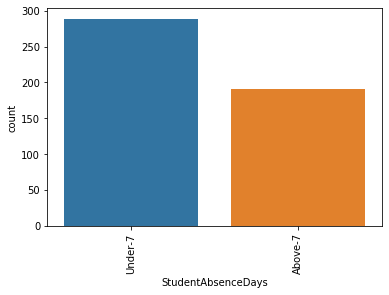

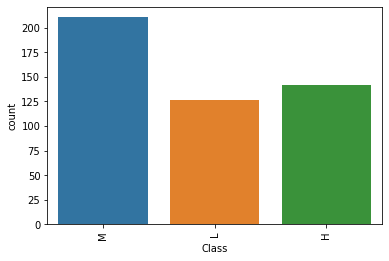

In [10]:
labels=['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']
for i in range(len(labels)):
    plt.figure()
    sns.countplot(x=data[labels[i]])
    plt.xlabel(labels[i])
    plt.xticks(rotation=90)

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [12]:
data['Class'] = label_encoder.fit_transform(data['Class'])
data['Class']=data['Class'].astype('int64')

In [13]:
intData=data.select_dtypes(include='int64')
intData.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
0,15,16,2,20,2
1,20,20,3,25,2
2,10,7,0,30,1
3,30,25,5,35,1
4,40,50,12,50,2


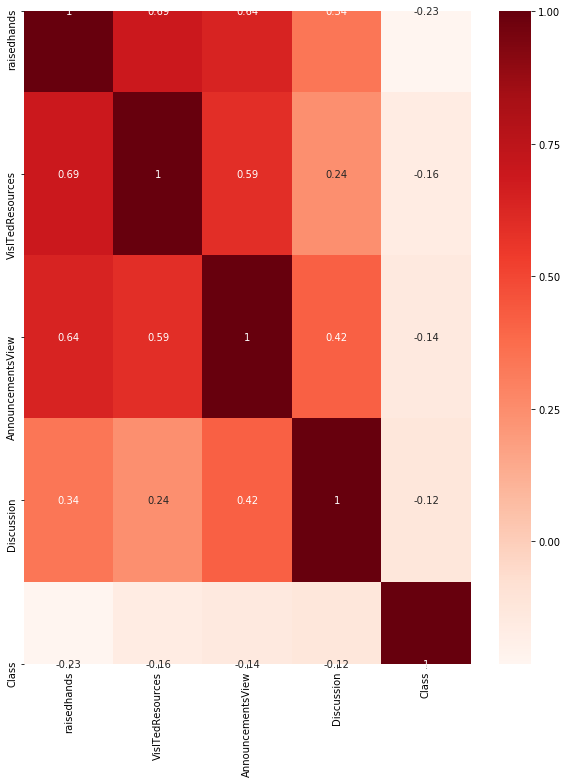

In [14]:
plt.figure(figsize=(10,12))
cor = intData.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [15]:
corr=intData.corr()
corr.nlargest(5,'Class')['Class']

Class                1.000000
Discussion          -0.121971
AnnouncementsView   -0.143996
VisITedResources    -0.161748
raisedhands         -0.231016
Name: Class, dtype: float64

In [16]:
from scipy.stats import pearsonr

In [17]:
corr=[]
for i in intData:
    x=pearsonr(intData[i],data['Class'])
    corr.append(x)
corr

[(-0.23101578434712589, 3.096280642820116e-07),
 (-0.1617480215704169, 0.00037377844330809375),
 (-0.14399589996628814, 0.0015611683154395878),
 (-0.12197106866705323, 0.007466682873850987),
 (0.9999999999999979, 0.0)]

In [18]:
x1=np.array(corr)
pvalue1=pd.Series(x1[:,1],index=intData.columns)
pvalue1

raisedhands          3.096281e-07
VisITedResources     3.737784e-04
AnnouncementsView    1.561168e-03
Discussion           7.466683e-03
Class                0.000000e+00
dtype: float64

In [19]:
DATA=data.copy()

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
data1.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

In [22]:
label_encoder = LabelEncoder()
DATA['gender'] = label_encoder.fit_transform(DATA['gender'])
DATA['NationalITy'] = label_encoder.fit_transform(DATA['NationalITy'])
DATA['PlaceofBirth'] = label_encoder.fit_transform(DATA['PlaceofBirth'])
DATA['StageID'] = label_encoder.fit_transform(DATA['StageID'])
DATA['SectionID'] = label_encoder.fit_transform(DATA['SectionID'])
DATA['Topic'] = label_encoder.fit_transform(DATA['Topic'])
DATA['Semester'] = label_encoder.fit_transform(DATA['Semester'])
DATA['Relation'] = label_encoder.fit_transform(DATA['Relation'])
DATA['ParentAnsweringSurvey'] = label_encoder.fit_transform(DATA['ParentAnsweringSurvey'])
DATA['ParentschoolSatisfaction'] = label_encoder.fit_transform(DATA['ParentschoolSatisfaction'])
DATA['StudentAbsenceDays'] = label_encoder.fit_transform(DATA['StudentAbsenceDays'])
DATA['Class'] = label_encoder.fit_transform(DATA['Class'])

In [23]:
DATA

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,G-04,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,G-04,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,G-04,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,G-04,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,G-04,0,7,0,0,40,50,12,50,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,3,3,1,G-08,0,2,1,0,5,4,5,8,0,0,0,1
476,0,3,3,1,G-08,0,5,0,0,50,77,14,28,0,0,1,2
477,0,3,3,1,G-08,0,5,1,0,55,74,25,29,0,0,1,2
478,0,3,3,1,G-08,0,6,0,0,30,17,14,57,0,0,0,1


In [24]:
X = DATA.drop(['Class','GradeID'],axis=1)
y = DATA['Class']

In [25]:
from sklearn.feature_selection import chi2

In [26]:
chi_scores = chi2(X,y)

In [27]:
chi_scores

(array([1.21501902e+01, 6.95502702e+00, 9.75721839e+00, 1.36112198e+00,
        5.15850555e-01, 1.39038817e+01, 3.99229972e+00, 4.79717673e+01,
        4.12455120e+03, 4.70083310e+03, 2.61890570e+03, 8.09349399e+02,
        4.17220341e+01, 2.68172275e+01, 8.96127511e+01]),
 array([2.29942746e-003, 3.08841086e-002, 7.60758735e-003, 5.06332865e-001,
        7.72652965e-001, 9.56776387e-004, 1.35857347e-001, 3.82880351e-011,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.78653309e-176,
        8.71315417e-010, 1.50214912e-006, 3.47406824e-020]))

In [28]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values

SectionID                    7.726530e-01
StageID                      5.063329e-01
Semester                     1.358573e-01
NationalITy                  3.088411e-02
PlaceofBirth                 7.607587e-03
gender                       2.299427e-03
Topic                        9.567764e-04
ParentschoolSatisfaction     1.502149e-06
ParentAnsweringSurvey        8.713154e-10
Relation                     3.828804e-11
StudentAbsenceDays           3.474068e-20
Discussion                  1.786533e-176
AnnouncementsView            0.000000e+00
VisITedResources             0.000000e+00
raisedhands                  0.000000e+00
dtype: float64

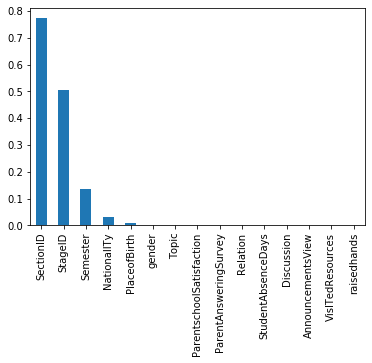

In [29]:
p_values.plot.bar()

# KNN algorithm

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
u=DATA.drop(['SectionID','StageID','Semester','Class','GradeID','Discussion'],axis=1)
v=DATA['Class']
u=np.array(u)
v=np.array(v)

In [33]:
u_train, u_test, v_train, v_test = train_test_split(u, v, test_size=0.3, random_state=1)

In [34]:
k=np.arange(1,25)
train_accuracy=np.empty(len(k))
test_accuracy=np.empty(len(k))
for i,k in enumerate(k):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(u_train,v_train)
    train_accuracy[i]=knn.score(u_train,v_train)
    test_accuracy[i]=knn.score(u_test,v_test)
    print(train_accuracy[i])
    print(test_accuracy[i])

1.0
0.5625
0.8303571428571429
0.5833333333333334
0.8005952380952381
0.5972222222222222
0.7678571428571429
0.5902777777777778
0.7470238095238095
0.5902777777777778
0.7172619047619048
0.6041666666666666
0.6845238095238095
0.5833333333333334
0.7023809523809523
0.625
0.6904761904761905
0.5763888888888888
0.6696428571428571
0.6180555555555556
0.6845238095238095
0.5972222222222222
0.6815476190476191
0.6527777777777778
0.6815476190476191
0.6319444444444444
0.6785714285714286
0.625
0.6875
0.625
0.6815476190476191
0.6527777777777778
0.6696428571428571
0.6388888888888888
0.6785714285714286
0.6388888888888888
0.6755952380952381
0.625
0.6755952380952381
0.6319444444444444
0.6696428571428571
0.6388888888888888
0.6845238095238095
0.6527777777777778
0.6815476190476191
0.6527777777777778
0.6845238095238095
0.6527777777777778


In [35]:
k=np.arange(1,25)
k

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

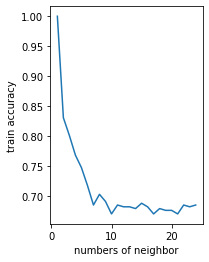

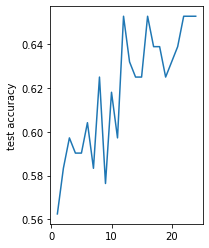

In [36]:
plt.subplot(1,2,1)
plt.plot(k,train_accuracy)
plt.xlabel('numbers of neighbor')
plt.ylabel('train accuracy')
plt.show()
plt.subplot(1,2,2)
plt.plot(k,test_accuracy)
plt.ylabel('test accuracy')
plt.show()

In [37]:
idx=np.where(test_accuracy==max(test_accuracy))
x=k[idx]
x[1]

16

In [38]:
model=KNeighborsClassifier(n_neighbors=x[0],p=1)
model.fit(u_train,v_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=1,
                     weights='uniform')

In [39]:
v_pred=model.predict(u_test)
v_pred

array([2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2,
       2, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 2, 2, 1, 1,
       2, 1, 2, 2, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 0, 0, 1, 0, 1, 2, 2, 2,
       2, 2, 2, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1,
       2, 2, 2, 0, 0, 2, 2, 0, 1, 1, 0, 1, 2, 2, 0, 0, 2, 2, 1, 0, 1, 0,
       2, 0, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 1, 2, 1, 2, 0, 2, 2, 1, 1, 2, 2], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(v_test,v_pred)

0.6319444444444444

In [41]:
model.score(u_train,v_train)

0.6845238095238095

In [42]:
confusion_matrix(v_test,v_pred)

array([[26,  2, 27],
       [ 0, 30,  3],
       [12,  9, 35]], dtype=int64)

In [43]:
print(classification_report(v_test,v_pred))

              precision    recall  f1-score   support

           0       0.68      0.47      0.56        55
           1       0.73      0.91      0.81        33
           2       0.54      0.62      0.58        56

    accuracy                           0.63       144
   macro avg       0.65      0.67      0.65       144
weighted avg       0.64      0.63      0.62       144



In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
conmat = confusion_matrix(v_test, v_pred)
print('Confusion matrix\n\n', conmat)

print('\nTrue Positives(tp) = ', conmat[0,0])

print('\nTrue Negatives(tn) = ', conmat[1,1])

print('\nFalse Positives(fp) = ', conmat[0,1])

print('\nFalse Negatives(fn) = ', conmat[1,0])

Confusion matrix

 [[26  2 27]
 [ 0 30  3]
 [12  9 35]]

True Positives(tp) =  26

True Negatives(tn) =  30

False Positives(fp) =  2

False Negatives(fn) =  0


In [46]:
tp = conmat[0,0]
tn = conmat[1,1]
fp = conmat[0,1]
fn = conmat[1,0]

In [47]:
classification_accuracy = (tp + tn) / float(tp + tn + fp + fn)
print('Classification accuracy knn : {0:0.4f}'.format(classification_accuracy))

Classification accuracy knn : 0.9655


In [48]:
classification_error = (fp + fn) / float(tp + tn + fp + fn)
print('Classification error knn : {0:0.4f}'.format(classification_error))

Classification error knn : 0.0345


In [49]:
precision = tp / float(tp + fp)
print('Precision knn : {0:0.4f}'.format(precision))

Precision knn : 0.9286


In [50]:
recall = tp / float(tp + fn)
print('Recall or Sensitivity knn: {0:0.4f}'.format(recall))

Recall or Sensitivity knn: 1.0000


In [51]:
true_positive_rate = tp / float(tp + fn)
print('True Positive Rate knn : {0:0.4f}'.format(true_positive_rate))

True Positive Rate knn : 1.0000


In [52]:
false_positive_rate = fp / float(fp + tn)
print('False Positive Rate knn: {0:0.4f}'.format(false_positive_rate))

False Positive Rate knn: 0.0625


In [53]:
specificity = tn / (tn + fp)
print('Specificity knn: {0:0.4f}'.format(specificity))

Specificity knn: 0.9375


# Naive bayes algorithm

In [54]:
x=DATA.drop(['SectionID','StageID','Semester','Class','GradeID','Discussion'],axis=1)
y=DATA['Class']
x=np.array(x)
y=np.array(y)

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [56]:
x=sc.fit_transform(x)
x

array([[ 0.7574764 , -0.1402013 , -0.15155299, ...,  0.8819171 ,
         0.80239368,  0.81295735],
       [ 0.7574764 , -0.1402013 , -0.15155299, ...,  0.8819171 ,
         0.80239368,  0.81295735],
       [ 0.7574764 , -0.1402013 , -0.15155299, ..., -1.13389342,
        -1.24627103, -1.23007683],
       ...,
       [-1.32017315, -0.54560266, -0.53241913, ..., -1.13389342,
        -1.24627103,  0.81295735],
       [-1.32017315, -0.54560266, -0.53241913, ..., -1.13389342,
        -1.24627103, -1.23007683],
       [-1.32017315, -0.54560266, -0.53241913, ..., -1.13389342,
        -1.24627103, -1.23007683]])

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=6)

In [59]:
from sklearn.naive_bayes import GaussianNB

In [60]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)

In [61]:
y_pred

array([0, 2, 2, 0, 2, 0, 2, 0, 2, 1, 1, 2, 1, 0, 0, 2, 0, 0, 0, 2, 1, 0,
       1, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 1, 2, 0, 0, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2,
       2, 0, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0,
       1, 2, 0, 2, 2, 1, 2, 1, 1, 1, 0, 1, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1,
       0, 0, 1, 2, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 2, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1], dtype=int64)

In [62]:
gnb.score(x_test,y_test)

0.7239583333333334

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test,y_pred)))

Model accuracy score: 0.7240


In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[49  1 10]
 [ 0 40  7]
 [23 12 50]]

True Positives(TP) =  49

True Negatives(TN) =  40

False Positives(FP) =  1

False Negatives(FN) =  0


In [67]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74        60
           1       0.75      0.85      0.80        47
           2       0.75      0.59      0.66        85

    accuracy                           0.72       192
   macro avg       0.73      0.75      0.73       192
weighted avg       0.73      0.72      0.72       192



In [69]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [70]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

In [71]:
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9889


In [72]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

In [73]:
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0111


In [76]:
precision = TP / float(TP + FP)

In [77]:
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9800


In [78]:
recall = TP / float(TP + FN)

In [79]:
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 1.0000


In [80]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 1.0000


In [81]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0244


In [82]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9756
